In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [2]:
data_celsius = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0, 14.76]
data_custom = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4, 58.568]
tensor_celsius = torch.tensor(data_celsius)
tensor_custom = torch.tensor(data_custom)

In [3]:
t_u = tensor_custom
t_c = tensor_celsius

In [4]:
linear_model = nn.Linear(1, 1)

In [5]:
t_u.shape

torch.Size([12])

In [6]:
# batching the data
t_u_batch = t_u.unsqueeze(1)
t_c_batch = t_c.unsqueeze(1)

In [7]:
t_u_batch.shape # 12 samples in a batch

torch.Size([12, 1])

#### playing with batch size

In [8]:
t_u_batchv2 = t_u_batch.view(2, 6, 1)

In [9]:
linear_model(t_u_batchv2)

tensor([[[-29.9360],
         [-46.6066],
         [-48.5047],
         [-68.0638],
         [-46.9367],
         [-40.8297]],

        [[-28.4505],
         [-18.4647],
         [-40.4170],
         [-50.3203],
         [-56.9225],
         [-48.8084]]], grad_fn=<AddBackward0>)

In [10]:
t_u_batchv2

tensor([[[35.7000],
         [55.9000],
         [58.2000],
         [81.9000],
         [56.3000],
         [48.9000]],

        [[33.9000],
         [21.8000],
         [48.4000],
         [60.4000],
         [68.4000],
         [58.5680]]])

In [11]:
# broadcasting on batch
t_p_batchv2 = 2*t_u_batchv2 + 1

In [12]:
t_p_batchv2

tensor([[[ 72.4000],
         [112.8000],
         [117.4000],
         [164.8000],
         [113.6000],
         [ 98.8000]],

        [[ 68.8000],
         [ 44.6000],
         [ 97.8000],
         [121.8000],
         [137.8000],
         [118.1360]]])

In [13]:
t_c_batchv2 = t_c_batch.view(2, 6, 1)

In [14]:
t_p_batchv2 - t_c_batchv2

tensor([[[ 71.9000],
         [ 98.8000],
         [102.4000],
         [136.8000],
         [102.6000],
         [ 90.8000]],

        [[ 65.8000],
         [ 48.6000],
         [ 91.8000],
         [108.8000],
         [116.8000],
         [103.3760]]])

In [15]:
linear_model.weight

Parameter containing:
tensor([[-0.8253]], requires_grad=True)

In [16]:
linear_model.bias

Parameter containing:
tensor([-0.4737], requires_grad=True)

In [17]:
linear_model.parameters()

<generator object Module.parameters at 0x000001F0C2A9F970>

#### Training the linear model

In [18]:
def training_loop_linear(n_epochs, optimizer, t_u_batch, t_c_batch, model, loss_fn):
    for epoch in range(1, n_epochs+1):
        t_p_batch = model(t_u_batch)
        loss = loss_fn(t_p_batch, t_c_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"epoch: {epoch}, loss: {loss}")

In [19]:
linear_model = nn.Linear(1, 1)
learning_rate = 1e-2
optimizer = optim.Adam(linear_model.parameters(), lr=learning_rate)

In [20]:
training_loop_linear(5000, optimizer, t_u_batch, t_c_batch, linear_model, loss_fn=nn.MSELoss())

epoch: 500, loss: 31.340036392211914
epoch: 1000, loss: 29.05510139465332
epoch: 1500, loss: 26.010499954223633
epoch: 2000, loss: 22.434249877929688
epoch: 2500, loss: 18.583568572998047
epoch: 3000, loss: 14.74837589263916
epoch: 3500, loss: 11.218238830566406
epoch: 4000, loss: 8.2334566116333
epoch: 4500, loss: 5.940358638763428
epoch: 5000, loss: 4.367180824279785


In [21]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.4584]], requires_grad=True),
 Parameter containing:
 tensor([-12.7901], requires_grad=True)]

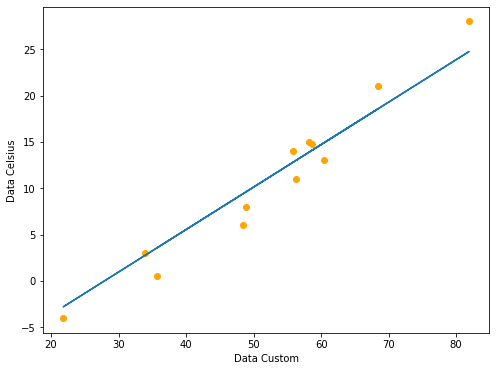

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_xlabel("Data Custom")
ax.set_ylabel("Data Celsius")

ax.scatter(data_custom, data_celsius, color="orange")

t_p_batch = linear_model(t_u_batch)
t_p = t_p_batch.squeeze(1)
ax.plot(t_u.numpy(), t_p.detach().numpy())

### Neural Network

In [23]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

In [24]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [25]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [26]:
learning_rate = 1e-3
optimizer = optim.Adam(seq_model.parameters(), lr=learning_rate)

In [27]:
training_loop_linear(8000, optimizer, t_u_batch, t_c_batch, seq_model, loss_fn=nn.MSELoss())

epoch: 500, loss: 97.82415771484375
epoch: 1000, loss: 66.1059341430664
epoch: 1500, loss: 50.96023941040039
epoch: 2000, loss: 39.82611846923828
epoch: 2500, loss: 30.46867561340332
epoch: 3000, loss: 22.800405502319336
epoch: 3500, loss: 16.87596893310547
epoch: 4000, loss: 12.532938957214355
epoch: 4500, loss: 9.49013614654541
epoch: 5000, loss: 7.413050174713135
epoch: 5500, loss: 5.914024829864502
epoch: 6000, loss: 4.7731709480285645
epoch: 6500, loss: 3.9316160678863525
epoch: 7000, loss: 3.34812331199646
epoch: 7500, loss: 2.9453318119049072
epoch: 8000, loss: 2.6382453441619873


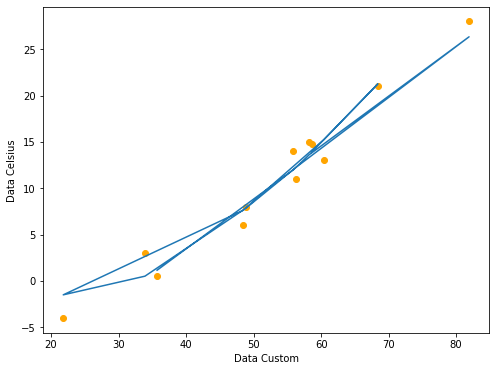

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.set_xlabel("Data Custom")
ax.set_ylabel("Data Celsius")

ax.scatter(data_custom, data_celsius, color="orange")

t_p_batch = seq_model(t_u_batch)
t_p = t_p_batch.squeeze(1)
ax.plot(t_u.numpy(), t_p.detach().numpy())